In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


## Load the data


In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv('train.csv')

df.head(30)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.000,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.000,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.000,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.000,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,0.675,-1.366,-999.000,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


-999.000 means missing value.

Prediction and PRI_jet_num are categorical values (22th column).

Others are continuous.

In [39]:
from load import *
from helpers import load_csv_data

data_path_tr = "train.csv"
data_path_te = "test.csv"
data_path_sub = "sample-submission.csv"

# load data.
y_tr, x_tr, ids_tr = load_csv_data(data_path_tr, sub_sample=False)
y_te, x_te, ids_te = load_csv_data(data_path_te, sub_sample=False)
y_su, x_su, ids_su = load_csv_data(data_path_sub, sub_sample=False)

In [40]:
print(y_tr)
#print(np.where(y_te==-1))

[1. 0. 0. ... 1. 0. 0.]


## Plot data

range(2, 32)


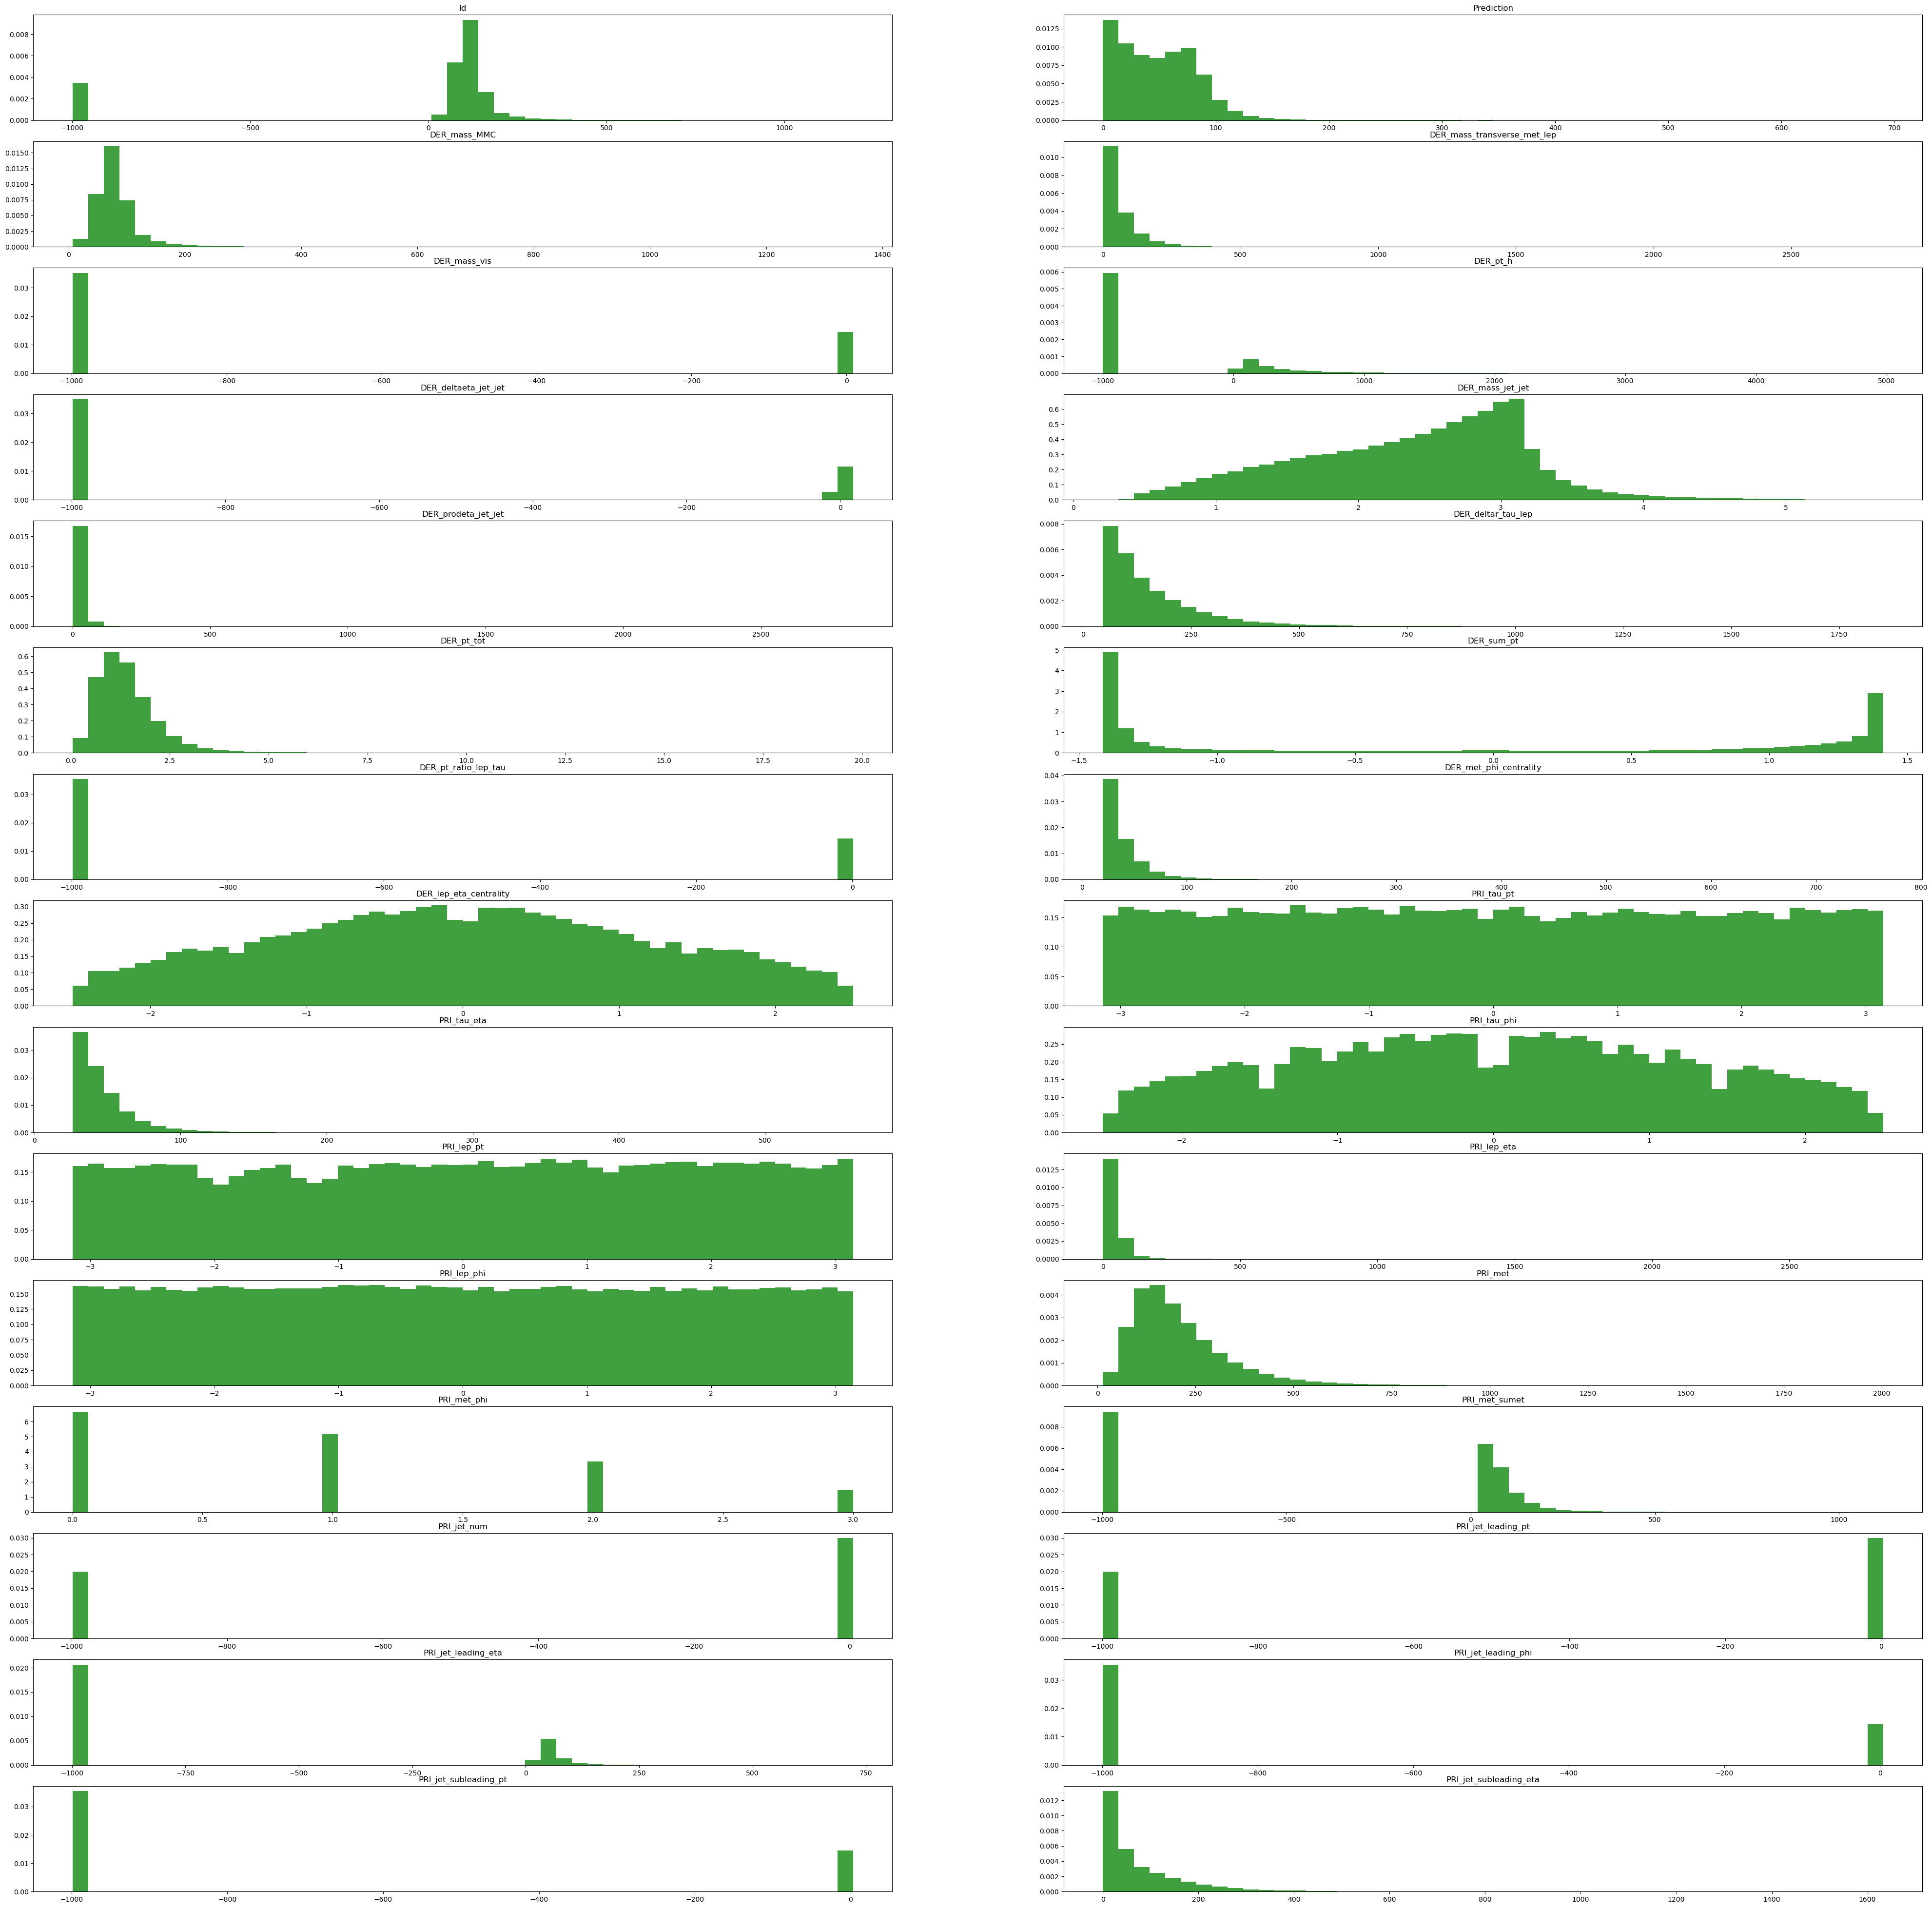

In [220]:
names = ["Id", "Prediction", "DER_mass_MMC", "DER_mass_transverse_met_lep", "DER_mass_vis", "DER_pt_h", "DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_deltar_tau_lep", "DER_pt_tot", "DER_sum_pt", "DER_pt_ratio_lep_tau", "DER_met_phi_centrality", "DER_lep_eta_centrality", "PRI_tau_pt", "PRI_tau_eta", "PRI_tau_phi", "PRI_lep_pt", "PRI_lep_eta", "PRI_lep_phi", "PRI_met", "PRI_met_phi", "PRI_met_sumet", "PRI_jet_num", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi", "PRI_jet_all_pt"]

fig, axs = plt.subplots(15, 2, figsize=(50,50))
print(range(2, len(names)))

for i in range(2, len(names)):
    axs[(i-2)//2, (i-2)%2].hist(x_tr[:,i-2], 50, density=True, facecolor='g', alpha=0.75)
    axs[(i-2)//2, (i-2)%2].set_title(names[i-2])

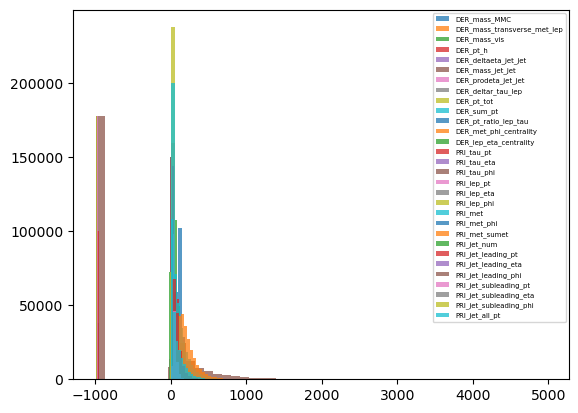

In [225]:
for i in range(2, len(names)):
    plt.hist(x_tr[:,i-2], 50, alpha=0.75, label = names[i])
    plt.legend(fontsize=5)

Outliers in -1000

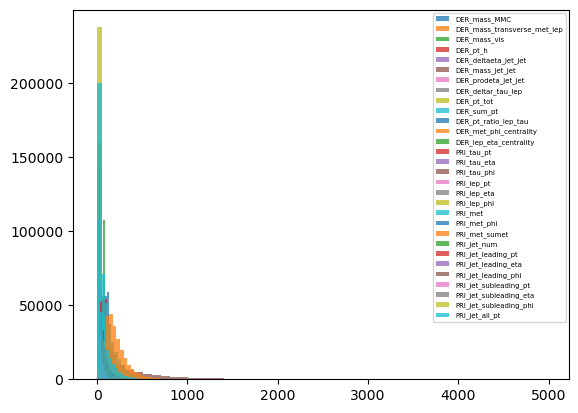

In [227]:
from load import *
#clean outliers 
x_tr_nan = put_nan(x_tr)

for i in range(2, len(names)):
    plt.hist(x_tr_nan[:,i-2], 50, alpha=0.75, label = names[i])
    plt.legend(fontsize=5)


PRI_jet_leading_phi has an outlier at 1000, we remove it

range(2, 32)


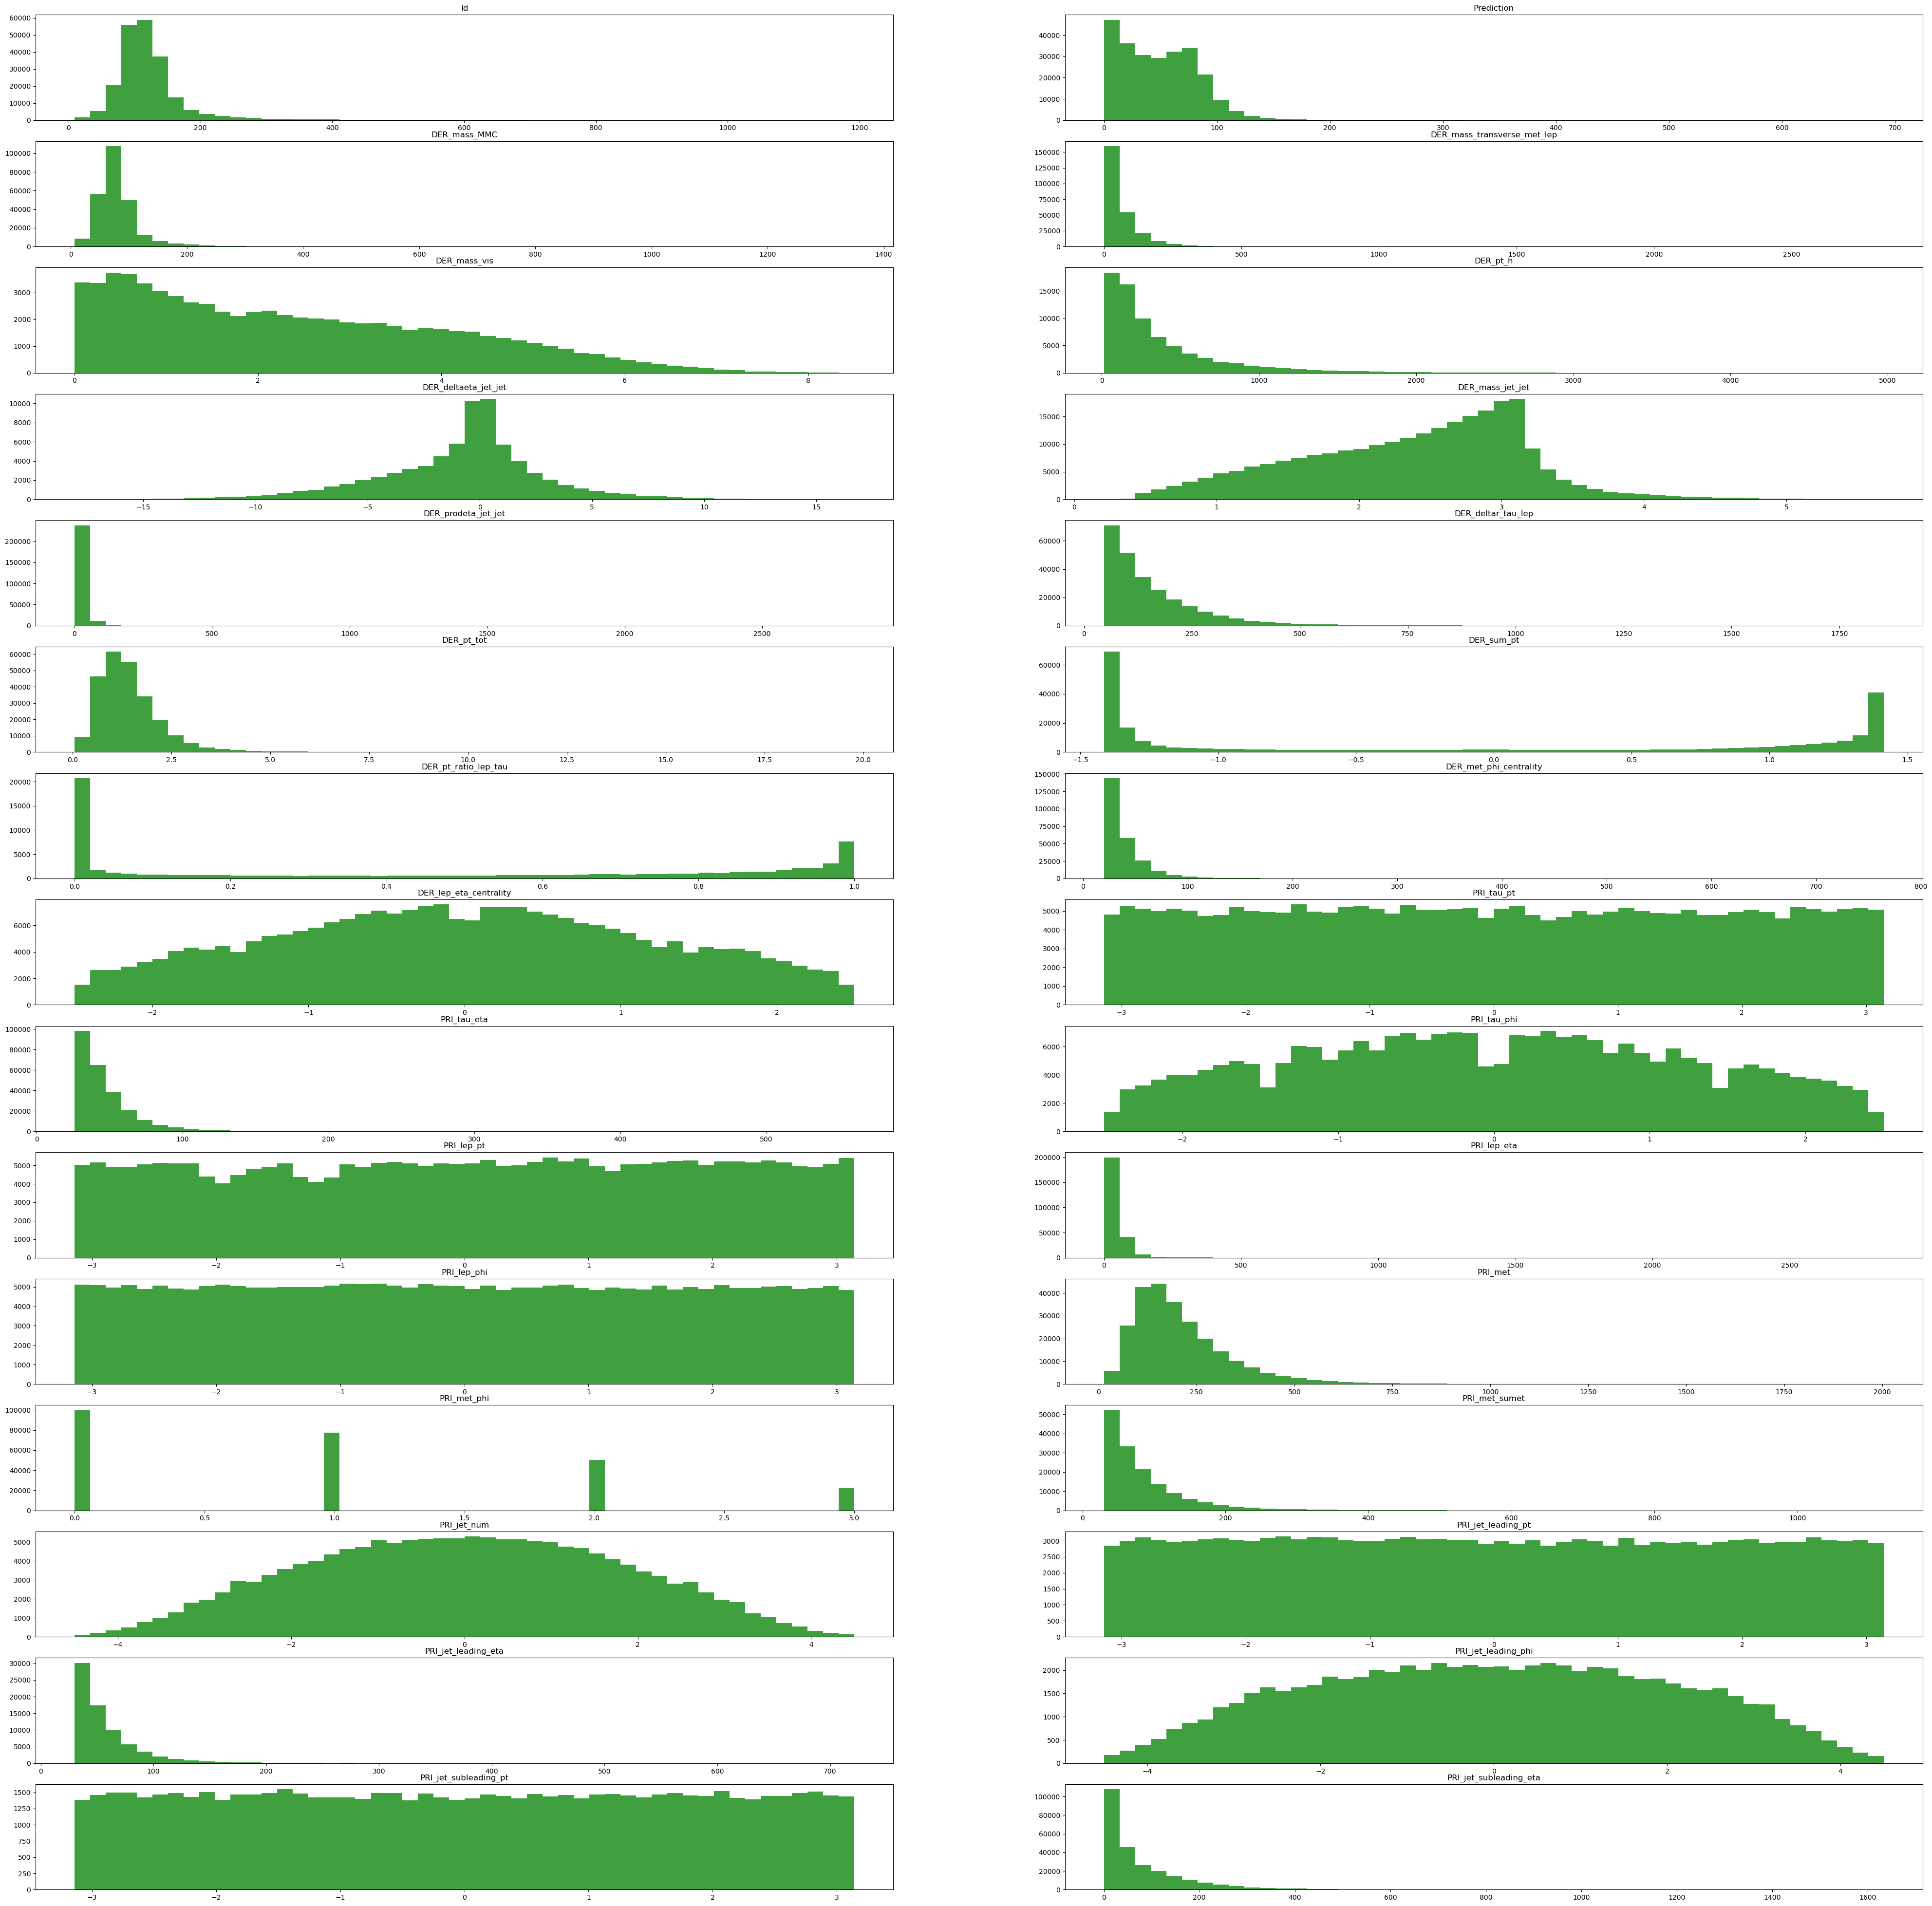

In [228]:
fig_n, axs_n = plt.subplots(15, 2, figsize=(50,50))
print(range(2, len(names)))

for i in range(2, len(names)):
    axs_n[(i-2)//2, (i-2)%2].hist(x_tr_nan[:,i-2], 50, facecolor='g', alpha=0.75)
    axs_n[(i-2)//2, (i-2)%2].set_title(names[i-2])

# Standardize data

We need to replace the missing data with smart values

Standardize the data using standardize from load.py  
We make sure to standardize the continuous data and not the classified one.

In [139]:
x_tr_class = x_tr_nan[:, 22]
#x_tr_reg = np.delete(x_tr_nan, 22, axis=1)
x_tr_reg = x_tr_nan

x_tr_norm, x_tr_mean, x_tr_std = standardize(x_tr_reg)

x_tr_median = np.nanmedian(x_tr_norm, axis=0)
x_tr_filled = fill_nan(x_tr_norm, x_tr_median)

#split the data according to PRI_jet_num
x_tr_split = np.array([x_tr_filled[np.where(x_tr_class==0)], x_tr_filled[np.where(x_tr_class==1)], 
                       x_tr_filled[np.where(x_tr_class==2)], x_tr_filled[np.where(x_tr_class==3)]], dtype=object)

y_tr_split = np.array([y_tr[np.where(x_tr_class==0)], y_tr[np.where(x_tr_class==1)], 
                       y_tr[np.where(x_tr_class==2)], y_tr[np.where(x_tr_class==3)]], dtype=object)

print(x_tr_filled[0])

[ 0.52901877 -0.40883582  0.08995612 -0.6645947  -0.95702946  0.38038153
 -0.93805956 -0.93376    -0.51391572  1.16952327 -0.94976991 -0.95177925
 -0.96469953 -0.61427475 -0.95587355 -0.9627442  -0.40914911 -0.9423051
 -0.99293834 -0.78511196 -0.96985252  1.82820907 -0.94525429 -0.23836591
 -0.94363386 -0.96206362 -0.46925649 -0.9534645  -0.99359731  0.25923771]


# Find right gamma

(250000, 30)
(20,)
gamma =  0.0001
iteration :  0  , loss :  2.144371889915281
iteration :  100  , loss :  2.1127455872088516
iteration :  200  , loss :  2.081154805448837
iteration :  300  , loss :  2.0496034225622966
iteration :  400  , loss :  2.0180958233222923
iteration :  500  , loss :  1.9866369806258912
iteration :  600  , loss :  1.9552325518296554
iteration :  700  , loss :  1.923888992513812
iteration :  800  , loss :  1.892613689900877
iteration :  900  , loss :  1.8614151176672167
loss =  1.8306136705065117
gamma =  0.005357894736842106
iteration :  0  , loss :  2.144371889915281
iteration :  100  , loss :  0.8522815325022283
iteration :  200  , loss :  0.6416429777413901
iteration :  300  , loss :  0.6196880143810969
iteration :  400  , loss :  0.6100399582467428
iteration :  500  , loss :  0.6044316336589071
iteration :  600  , loss :  0.6008247971484043
iteration :  700  , loss :  0.5982064454648999
iteration :  800  , loss :  0.5960906152951625
iteration :  900  , loss

iteration :  800  , loss :  0.5404437733483108
iteration :  900  , loss :  0.5389974975626918
loss =  0.5378805023816814
gamma =  0.08422631578947369
iteration :  0  , loss :  2.144371889915281
iteration :  100  , loss :  0.5844305664105907
iteration :  200  , loss :  0.5685345235704077
iteration :  300  , loss :  0.5583867312551449
iteration :  400  , loss :  0.5516503518510677
iteration :  500  , loss :  0.5470262031245557
iteration :  600  , loss :  0.5437579777105409
iteration :  700  , loss :  0.5413873209119249
iteration :  800  , loss :  0.5396265238418628
iteration :  900  , loss :  0.538289556078647
loss =  0.5372622638198922
gamma =  0.08948421052631579
iteration :  0  , loss :  2.144371889915281
iteration :  100  , loss :  0.5831987406742349
iteration :  200  , loss :  0.5670139381897331
iteration :  300  , loss :  0.5569133100200923
iteration :  400  , loss :  0.5503328279348098
iteration :  500  , loss :  0.5458853909719562
iteration :  600  , loss :  0.5427823100504993
it

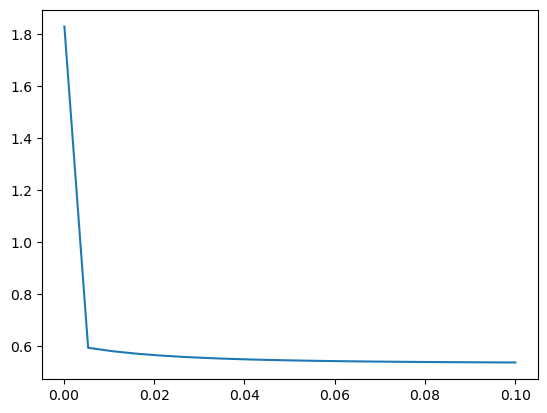

In [102]:
from implementations import *
from load import *

tx = x_tr_filled
print(tx.shape)
y = y_tr

lambda_ = 10**(-7)
initial_w = np.array([-0.07, 0.02, 0.03, 0.2, 0.3, -0.1, 0.3, 0.3, 0.25, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3, 1, 0.3, 0.1, 0.3, 0.3, 0.2])
max_iters = 1000
fonction_to_optimize = 'reg_logistic_regression'
start_gamma = 10**(-4)
end_gamma = 10**(-1)
number = 20

gamma_tab, losses_tab = search_gamma(y, tx, lambda_, initial_w, max_iters, fonction_to_optimize, start_gamma, end_gamma, number)


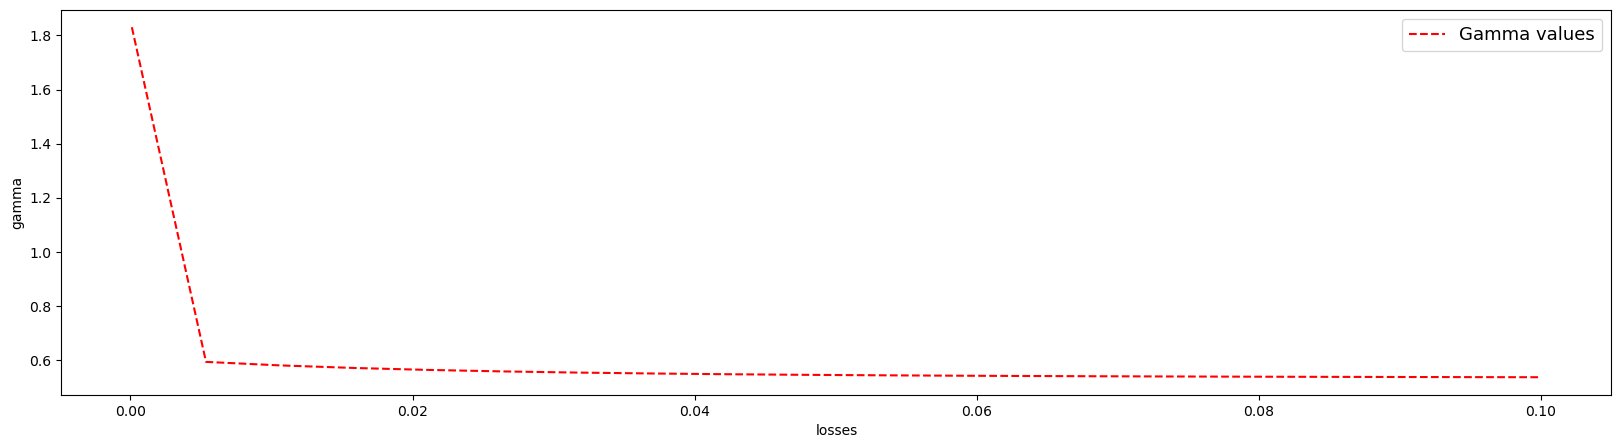

In [230]:
plt.figure(figsize=(20,5))
plt.plot(gamma_tab, losses_tab, 'r--')
plt.xlabel('losses')
plt.ylabel('gamma')
plt.legend(['Gamma values'], fontsize=13)


# TRAIN Gradient descent 

In [101]:
# from gradient_descent import *

from datetime import datetime
#from plots import *
from implementations import *

# Define the parameters of the algorithm.
lambda_ = 10**(-7)
initial_w = np.full(x_tr_filled.shape[1], 0.1)
w = np.array([0.004, -0.018, -0.0005, 0.12, 0.08, 0.2, 0.07, 0.08, 0.05, -0.04, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.15, 0.3, 0.3, 0.1, 0.3, -0.2, 0.1, 0.3,1,  0.3, 0.1, 0.3, 0.13, 0.1])
print(w.shape)
max_iters = 10000
gamma = 10**(-1) #learing rate

tx = x_tr_1
y = y_tr_1


# Initialization

# Start gradient descent
start_time = datetime.now()

#for i in range(x_tr_split.shape[0]) :  
#    w, losses = reg_logistic_regression(y_tr_split[i], x_tr_split[i], lambda_, w, max_iters, gamma)

w, losses = reg_logistic_regression(y_tr_split[i], x_tr_split[i], lambda_, w, max_iters, gamma)

    
end_time = datetime.now()

# Print result
execution_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=execution_time))
print(losses, w)

(30,)
iteration :  0  , loss :  1.2104256600119314
iteration :  100  , loss :  0.5224895241075732
iteration :  200  , loss :  0.49782218935607037
iteration :  300  , loss :  0.4826016509573572
iteration :  400  , loss :  0.4725725716431698
iteration :  500  , loss :  0.4656575028193824
iteration :  600  , loss :  0.4607198106041007
iteration :  700  , loss :  0.45708981126426895
iteration :  800  , loss :  0.4543524514907786
iteration :  900  , loss :  0.45224068851050603
iteration :  1000  , loss :  0.4505775579824929
iteration :  1100  , loss :  0.4492428765813912
iteration :  1200  , loss :  0.4481532782923529
iteration :  1300  , loss :  0.44724983939448243
iteration :  1400  , loss :  0.4464901948538161
iteration :  1500  , loss :  0.4458433987052578
iteration :  1600  , loss :  0.44528650602430986
iteration :  1700  , loss :  0.44480225981813715
iteration :  1800  , loss :  0.4443775012564614
iteration :  1900  , loss :  0.44400206178108975
iteration :  2000  , loss :  0.44366798

iteration :  7100  , loss :  0.5696048775741718
iteration :  7200  , loss :  0.5695993825364033
iteration :  7300  , loss :  0.569593942116762
iteration :  7400  , loss :  0.5695885527568773
iteration :  7500  , loss :  0.5695832111667827
iteration :  7600  , loss :  0.5695779143022421
iteration :  7700  , loss :  0.5695726593441288
iteration :  7800  , loss :  0.5695674436797965
iteration :  7900  , loss :  0.5695622648860936
iteration :  8000  , loss :  0.569557120713987
iteration :  8100  , loss :  0.5695520090744967
iteration :  8200  , loss :  0.5695469280259806
iteration :  8300  , loss :  0.569541875762453
iteration :  8400  , loss :  0.5695368506030107
iteration :  8500  , loss :  0.5695318509821148
iteration :  8600  , loss :  0.5695268754407522
iteration :  8700  , loss :  0.5695219226183345
iteration :  8800  , loss :  0.5695169912452788
iteration :  8900  , loss :  0.5695120801362292
iteration :  9000  , loss :  0.5695071881838314
iteration :  9100  , loss :  0.569502314352

iteration :  4300  , loss :  0.5479975851882802
iteration :  4400  , loss :  0.5479882356757467
iteration :  4500  , loss :  0.5479793215967292
iteration :  4600  , loss :  0.5479708147263744
iteration :  4700  , loss :  0.5479626887166641
iteration :  4800  , loss :  0.5479549189609904
iteration :  4900  , loss :  0.5479474824711073
iteration :  5000  , loss :  0.5479403577647879
iteration :  5100  , loss :  0.5479335247628311
iteration :  5200  , loss :  0.5479269646942899
iteration :  5300  , loss :  0.5479206600090005
iteration :  5400  , loss :  0.5479145942966306
iteration :  5500  , loss :  0.5479087522115957
iteration :  5600  , loss :  0.5479031194032906
iteration :  5700  , loss :  0.5478976824511549
iteration :  5800  , loss :  0.5478924288041653
iteration :  5900  , loss :  0.5478873467243931
iteration :  6000  , loss :  0.5478824252343114
iteration :  6100  , loss :  0.5478776540675688
iteration :  6200  , loss :  0.547873023622981
iteration :  6300  , loss :  0.5478685249

In [ ]:
print(losses)
#print(tx)

# TEST

In [104]:
print(tx.shape)

print(x_te.shape)
x_te2 = np.delete(x_te, 22, axis=1)

proba = x_te2@w
y_hat=[]

for i in proba:
    if i>0:
        y_hat.append(1)
    else :
        y_hat.append(-1)

total_loss = np.sum(np.abs(y_te-y_hat))/len(y_te)

print(total_loss)

(250000, 30)
(568238, 30)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 30 is different from 29)

We fix the initial values of the parameters, based on running the algorithm several times and noting down the final parameter values. It gives us a better starting point and helps to achieve a better performance in a limited number of iterations.

# Create csv for submission

In [91]:
from helpers import *

create_csv_submission(ids_te, y_hat, 'test_3')